<a href="https://colab.research.google.com/github/ReidelVichot/DSTEP23/blob/main/week_10/dstep23_trajectories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DSTEP23 // Distances in Geosptial Data: Three Levels of Specificity**

*October 31, 2023*

This notebook will introduce [OSMnx](https://geoffboeing.com/2016/11/osmnx-python-street-networks/) as a tool for calculating paths on road networks.

---

In [1]:
# -- install osmnx
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 2.2 MB/s eta 0:00:00


In [2]:
import time
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx

First let's load in some useful data,

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# -- set data path
dpath = "/content/drive/Shareddrives/dstep23/data/"

# -- load parks shapes and subselect only Manhattan
pname = dpath + "nycdpr/geo_export_ae29c34b-5e04-4a3a-a111-19ed6bcf3f88.shp"
parks = gp.read_file(pname)
parks = parks[parks["borough"] == "M"]

### **Street Networks and Paths with `OSMnx`**

In [7]:
#ox.graph_from_place?

In [6]:
# -- get the street networks for Wilmington, DE
graph_wilm = ox.graph_from_place("Wilmington, DE", network_type="walk")

In [8]:
graph_wilm

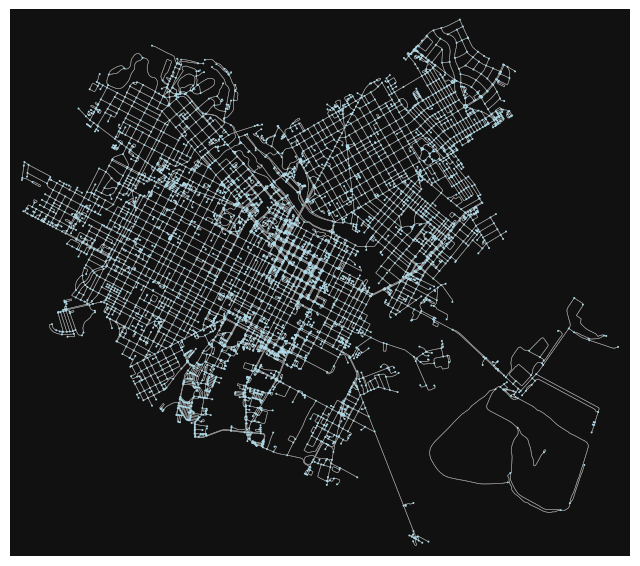

In [11]:
# -- plot the network
fig, ax = ox.plot_graph(graph_wilm, node_size=2, node_color="lightblue", edge_linewidth=0.4)

In [13]:
# -- get the street network for Manhattan
graph_mn = ox.graph_from_place("Manhattan, NYC", network_type="walk")

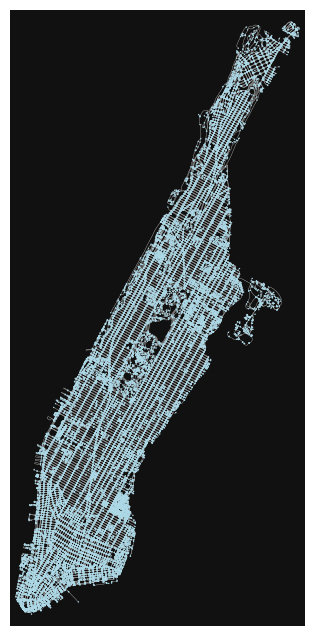

In [14]:
# -- plot the network
fig, ax = ox.plot_graph(graph_mn, node_size=1, node_color="lightblue", edge_linewidth=0.2)

In [16]:
# -- print list of nodes
nnodes = len(graph_mn.nodes())
nodes10 = list(graph_mn.nodes())[:10]
print("total number of nodes : {0}".format(nnodes))
print("first ten node \"numbers\" : {0}".format(nodes10))

total number of nodes : 45252
first ten node "numbers" : [30807314, 30978752, 42421728, 42421731, 42421737, 42421741, 42421745, 42421749, 42421751, 42421769]


In [17]:
# -- get information about the first node
graph_mn.nodes[30807314]

{'y': 40.7907204, 'x': -73.9635764, 'street_count': 4}

In [18]:
type(graph_mn)

networkx.classes.multidigraph.MultiDiGraph

In [19]:
type(graph_mn.nodes)

networkx.classes.reportviews.NodeView

In [21]:
type(graph_mn.nodes[30807314])

dict

In [23]:
graph_mn.nodes[30807314]["x"]

-73.9635764

Now let's calculate the shortest distance between two points on this graph.

In [24]:
# -- get the latitude and longitude of the Flat Iron Building
lat_fli = 40.740947
lon_fli = -73.989645

# -- set latitude and longitude of Ahearn park
lat_ahearn = 40.714913
lon_ahearn = -73.983442

In [25]:
# -- find nearest node of for origin and desination
orig = ox.nearest_nodes(graph_mn, lon_fli, lat_fli)
dest = ox.nearest_nodes(graph_mn, lon_ahearn, lat_ahearn)

In [26]:
orig

7578918690

In [27]:
# -- calculate route
t0 = time.time()
route = nx.shortest_path(graph_mn, orig, dest, weight="lenght")
t1 = time.time()
print("route calculated in {0}s".format(t1 - t0))

route calculated in 0.15317344665527344s


In [ ]:
ox.utils_graph.graph_to_gdfs()

In [30]:
# -- get total distance in meters
route_gdf = ox.utils_graph.route_to_gdf(graph_mn, route)
dist = route_gdf["length"].sum()

print("distance = {0:.2f} meters".format(dist))

distance = 4824.88 meters


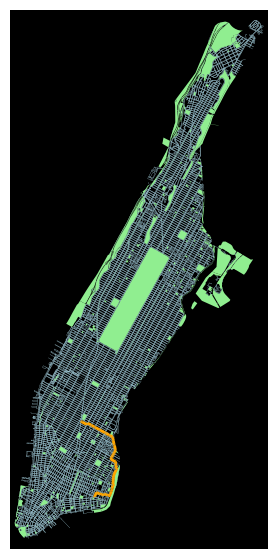

In [31]:
# -- plot the route
fig, ax = plt.subplots(figsize=(7, 7))
ox.plot_graph(graph_mn, node_size=0, edge_linewidth=0.1, edge_color="lightblue", ax=ax, show=False)
parks.plot(facecolor="lightgreen", ax=ax)
route_gdf.plot(color="orange", linewidth=2, ax=ax)
ax.set_facecolor("black")
fig.show()

In [ ]:
# -- plot the route
fig, ax = plt.subplots(figsize=(7, 7))
ox.plot_graph(graph_mn, node_size=0, edge_linewidth=0.1, edge_color="lightblue", ax=ax, show=False)
parks.plot(facecolor="lightgreen", ax=ax)
route_gdf.plot(color="orange", linewidth=2, ax=ax)
ax.set_facecolor("black")
ax.set
fig.show()